Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pandas==1.3.6 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5, 1.4.0rc0, 1.4.0, 1.4.1, 1.4.2, 1.4.3, 1.4.4, 1.5.0rc0, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 2.0.0rc0, 2.0.0rc1, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0rc0, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0, 2.2.1, 2.2.2, 2.2.3)
ERROR: No matching distribution found for pandas==1.3.6


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import  matplotlib.pyplot as plt

from sklearn import model_selection  
from sklearn import ensemble  
from sklearn import svm  
from sklearn import neighbors  
from sklearn.model_selection import train_test_split  
from sklearn import preprocessing  
from sklearn.ensemble import VotingClassifier  

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

c:\Users\Eloi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Données propres

In [11]:
df = pd.read_csv('data_merge_v2.csv')

In [12]:
df.head()

,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,puiss_max,conso_urb,conso_exurb,...,gamme,Mp,Ct,W (mm),At1 (mm),At2 (mm),ec (cm3),typ_boite,nb_rapp,category
0,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),GO,non,9,125.0,6.9,4.3,...,MOY-SUPER,NaN,M1,2703.0,1579.0,1559.0,1956.0,M,6,C
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,GO,non,9,125.0,6.6,4.3,...,MOY-SUPER,NaN,M1,2703.0,1593.0,1575.0,1956.0,M,6,C
2,ALFA-ROMEO,159,159,159 SW 2.0 JTDm (170ch),GO,non,9,125.0,7.1,4.4,...,MOY-SUPER,NaN,M1,2703.0,1579.0,1559.0,1956.0,M,6,D
3,ALFA-ROMEO,159,159,159 SW 2.0 JTDm (170ch) ECO,GO,non,9,125.0,6.7,4.4,...,MOY-SUPER,NaN,M1,2703.0,1593.0,1575.0,1956.0,M,6,C
4,ALFA-ROMEO,AR8C SPIDER,8C SPIDER,8C SPIDER,ES,non,38,331.0,24.4,11.6,...,LUXE,FIAT GROUP AUTOMOBILES SPA,M1,2645.0,1590.0,1589.0,4691.0,M,6,G


In [2]:
df = pd.read_csv('Donnees_propres.csv')
df.head()

,lib_mrq,lib_mod_doss,lib_mod,dscom,hybride,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,...,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme,carburant,typ_boite,nb_rapp,etiquette
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),non,12,147.0,11.3,5.8,7.8,...,0.002,1505,1505,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,E
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),non,12,147.0,11.5,6.0,8.0,...,0.002,1555,1555,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,E
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),non,7,100.0,6.6,4.2,5.1,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),non,7,100.0,6.6,4.2,5.1,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),non,9,125.0,6.9,4.3,5.3,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C


In [14]:
df['hybride'] = df ['hybride'].replace({'oui' : 1, 'non' : 0})

etiquette_dico = {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6}
df['etiquette'] = df['etiquette'].replace(etiquette_dico)


C:\Users\Eloi\AppData\Local\Temp\ipykernel_9620\4184738555.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hybride'] = df ['hybride'].replace({'oui' : 1, 'non' : 0})
C:\Users\Eloi\AppData\Local\Temp\ipykernel_9620\4184738555.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['etiquette'] = df['etiquette'].replace(etiquette_dico)


In [15]:
df.head()

,lib_mrq,lib_mod_doss,lib_mod,dscom,hybride,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,...,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme,carburant,typ_boite,nb_rapp,etiquette
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),0,12,147.0,11.3,5.8,7.8,...,0.002,1505,1505,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,4
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),0,12,147.0,11.5,6.0,8.0,...,0.002,1555,1555,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,4
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),0,7,100.0,6.6,4.2,5.1,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,2
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),0,7,100.0,6.6,4.2,5.1,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,2
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),0,9,125.0,6.9,4.3,5.3,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,2


In [16]:
df.nunique()

lib_mrq              40
lib_mod_doss        377
lib_mod             352
dscom              3095
hybride               2
puiss_admin_98       48
puiss_max           153
conso_urb           155
conso_exurb          77
conso_mixte         104
co2                 203
co_typ_1            478
nox                 220
ptcl                  8
masse_ordma_min     731
masse_ordma_max     772
champ_v9             34
Carrosserie          11
gamme                 6
carburant             4
typ_boite             3
nb_rapp               6
etiquette             7
dtype: int64

In [17]:
df.drop(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'champ_v9'], axis=1, inplace = True)

In [18]:
df_encoded = pd.get_dummies(df, dtype='int' )

In [19]:
df_encoded

,hybride,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,co2,co_typ_1,nox,ptcl,...,gamme_MOY-INFER,gamme_MOY-SUPER,gamme_SUPERIEURE,carburant_Essence,carburant_Essence/Elec,carburant_Gasoil/Elec,carburant_Gazoil,typ_boite_Auto,typ_boite_Manuelle,typ_boite_Var_continue
0,0,12,147.0,11.3,5.8,7.8,182.0,0.647,0.032,0.002,...,0,1,0,1,0,0,0,0,1,0
1,0,12,147.0,11.5,6.0,8.0,186.0,0.647,0.032,0.002,...,0,1,0,1,0,0,0,0,1,0
2,0,7,100.0,6.6,4.2,5.1,134.0,0.066,0.149,0.001,...,0,1,0,0,0,0,1,0,1,0
3,0,7,100.0,6.6,4.2,5.1,134.0,0.066,0.149,0.001,...,0,1,0,0,0,0,1,0,1,0
4,0,9,125.0,6.9,4.3,5.3,139.0,0.060,0.164,0.001,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52303,0,9,133.0,4.9,4.3,4.5,117.0,0.215,0.068,0.000,...,0,0,1,0,0,0,1,0,1,0
52304,0,10,133.0,5.6,4.5,4.9,129.0,0.114,0.048,0.002,...,0,0,1,0,0,0,1,1,0,0
52305,0,11,133.0,8.6,5.2,6.4,169.0,0.344,0.116,0.000,...,0,0,1,0,0,0,1,1,0,0
52306,0,13,158.0,8.6,5.2,6.4,169.0,0.344,0.116,0.000,...,0,0,1,0,0,0,1,1,0,0


<Axes: >

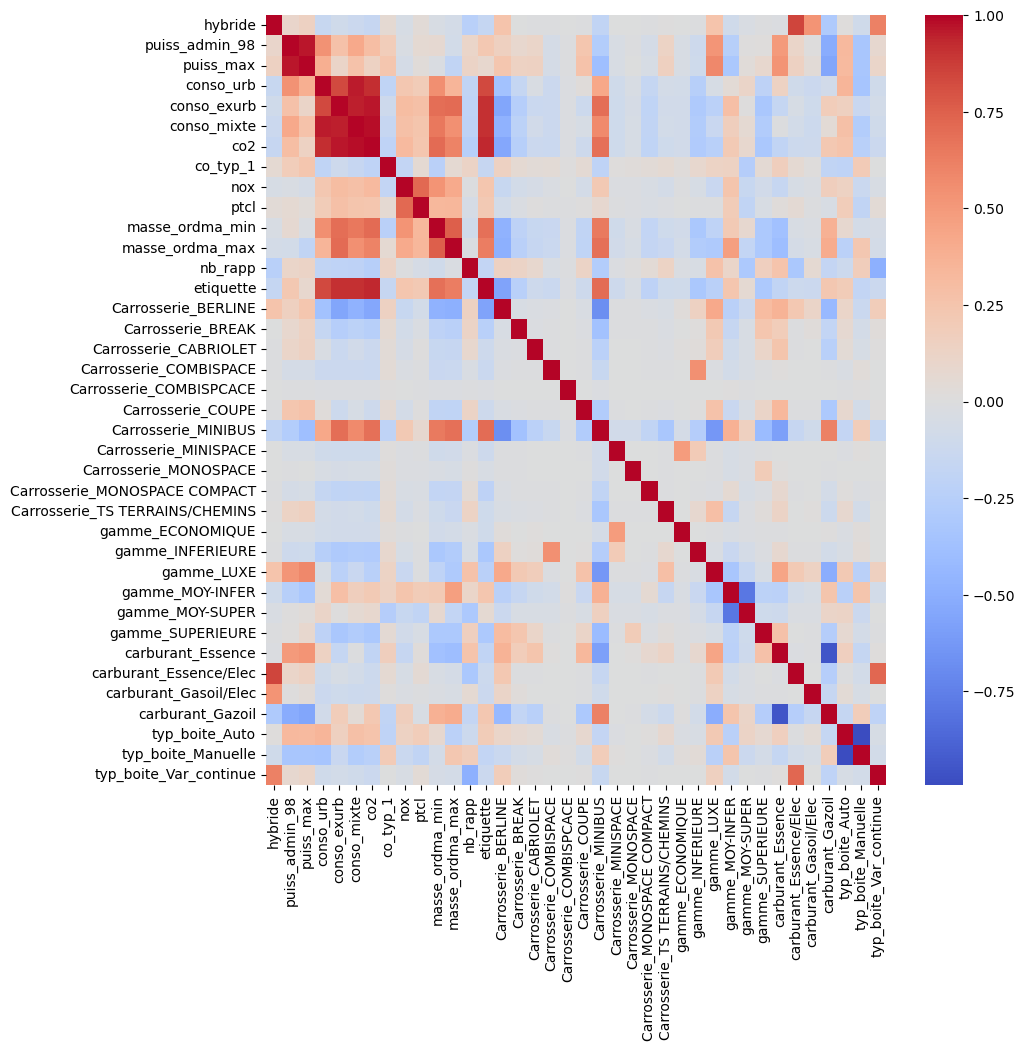

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', fmt='.01f')

## premier SVM

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

SVM = svm.SVC()
parametres = {'C':[0.1,1,10,30],
              'kernel':['linear', 'sigmoid', 'rbf']}
clf_svm = model_selection.GridSearchCV(svm, parametres, cv=5, scoring='accuracy')

X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train).ravel()
clf_svm.fit(X_train_scaled, y_train)
print("Meilleurs paramètres :", clf_svm.best_params_)
print("Meilleur score :", clf_svm.best_score_)
y_pred_svm_best = clf_svm.best_estimator_.predict(X_test_scaled)
print(pd.crosstab(y_test, y_pred_svm_best, rownames=['Classe réelle'], colnames=['Classe prédite']))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred_svm_best))

In [21]:
X = df_encoded.drop(['etiquette', 'co2'], axis=1)
y = df_encoded['etiquette']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
print(np.mean(X_train_scaled, axis = 0),'\n',
    np.std(X_train_scaled, axis = 0))

[-3.10492524e-18 -1.99685505e-16  4.05774918e-16 -7.27910911e-16
  7.04623972e-16  4.44392425e-16 -2.13463610e-17  4.46333003e-17
 -1.00133839e-16 -8.05339985e-16 -3.22524109e-16  2.91280799e-16
 -4.50214160e-17  3.55125825e-17  5.56945965e-17 -1.68830310e-17
  3.68709872e-18 -3.88115655e-19 -5.53064809e-17  3.88115655e-18
 -7.37419745e-18 -1.86295514e-17  2.14433899e-17 -4.65738786e-18
 -2.25107080e-17  1.97938984e-17  1.66889732e-17 -6.73380662e-17
  7.41300901e-17  4.81263412e-17  6.01579266e-18  3.10492524e-18
  1.18375275e-16 -7.56825528e-18 -5.74411170e-17  5.43361917e-18] 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [24]:
SVM = svm.SVC()
parametres = {'C':[0.1,1,10,30],
              'kernel':['linear', 'sigmoid', 'rbf']}
clf_svm = model_selection.GridSearchCV(SVM, parametres, cv=5, scoring='accuracy')

In [25]:
X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train).ravel()
clf_svm.fit(X_train_scaled, y_train)
print("Meilleurs paramètres :", clf_svm.best_params_)
print("Meilleur score :", clf_svm.best_score_)
y_pred_svm_best = clf_svm.best_estimator_.predict(X_test_scaled)
print(pd.crosstab(y_test, y_pred_svm_best, rownames=['Classe réelle'], colnames=['Classe prédite']))


Meilleurs paramètres : {'C': 10, 'kernel': 'linear'}
Meilleur score : 0.9979789703673358
Classe prédite   0    1    2    3     4     5    6
Classe réelle                                     
0               68    0    0    0     0     0    0
1                0  373    2    0     0     0    0
2                0    9  678    1     0     0    0
3                0    0    5  458     8     0    0
4                0    0    0    5  4846     2    0
5                0    0    0    0     0  9064    1
6                0    0    0    0     0     0  173


In [ ]:
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_svm_best))


Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.98      0.99      0.99       375
           2       0.99      0.99      0.99       688
           3       0.99      0.97      0.98       471
           4       1.00      1.00      1.00      4853
           5       1.00      1.00      1.00      9065
           6       0.99      1.00      1.00       173

    accuracy                           1.00     15693
   macro avg       0.99      0.99      0.99     15693
weighted avg       1.00      1.00      1.00     15693



Soit il y a un leak, soit certaines données sont beaucoup trop corrélé

# df_merge

In [3]:
df_merge = pd.read_csv('data_merge_v2.csv')
df_merge.head()

,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,puiss_max,conso_urb,conso_exurb,...,gamme,Mp,Ct,W (mm),At1 (mm),At2 (mm),ec (cm3),typ_boite,nb_rapp,category
0,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),GO,non,9,125.0,6.9,4.3,...,MOY-SUPER,NaN,M1,2703.0,1579.0,1559.0,1956.0,M,6,C
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,GO,non,9,125.0,6.6,4.3,...,MOY-SUPER,NaN,M1,2703.0,1593.0,1575.0,1956.0,M,6,C
2,ALFA-ROMEO,159,159,159 SW 2.0 JTDm (170ch),GO,non,9,125.0,7.1,4.4,...,MOY-SUPER,NaN,M1,2703.0,1579.0,1559.0,1956.0,M,6,D
3,ALFA-ROMEO,159,159,159 SW 2.0 JTDm (170ch) ECO,GO,non,9,125.0,6.7,4.4,...,MOY-SUPER,NaN,M1,2703.0,1593.0,1575.0,1956.0,M,6,C
4,ALFA-ROMEO,AR8C SPIDER,8C SPIDER,8C SPIDER,ES,non,38,331.0,24.4,11.6,...,LUXE,FIAT GROUP AUTOMOBILES SPA,M1,2645.0,1590.0,1589.0,4691.0,M,6,G


In [36]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lib_mrq          5890 non-null   object 
 1   lib_mod_doss     5890 non-null   object 
 2   lib_mod          5890 non-null   object 
 3   dscom            5890 non-null   object 
 4   cod_cbr          5890 non-null   object 
 5   hybride          5890 non-null   object 
 6   puiss_admin_98   5890 non-null   int64  
 7   puiss_max        5890 non-null   float64
 8   conso_urb        5890 non-null   float64
 9   conso_exurb      5890 non-null   float64
 10  conso_mixte      5890 non-null   float64
 11  co2              5890 non-null   float64
 12  co_typ_1         5878 non-null   float64
 13  nox              5878 non-null   float64
 14  ptcl             4484 non-null   float64
 15  masse_ordma_min  5890 non-null   int64  
 16  masse_ordma_max  5890 non-null   int64  
 17  champ_v9      

In [37]:
df_merge = df_merge.drop(['lib_mrq','lib_mod_doss' ,'lib_mod','dscom','Mp','Ct', 'champ_v9'], axis=1)
df_merge.head()

,cod_cbr,hybride,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,co2,co_typ_1,nox,...,masse_ordma_max,Carrosserie,gamme,W (mm),At1 (mm),At2 (mm),ec (cm3),typ_boite,nb_rapp,category
0,GO,non,9,125.0,6.9,4.3,5.300000,139.0,0.060,0.164,...,1565,BERLINE,MOY-SUPER,2703.0,1579.0,1559.0,1956.0,M,6,C
1,GO,non,9,125.0,6.6,4.3,5.100000,136.0,0.192,0.169,...,1565,BERLINE,MOY-SUPER,2703.0,1593.0,1575.0,1956.0,M,6,C
2,GO,non,9,125.0,7.1,4.4,5.400000,142.0,0.060,0.164,...,1615,BREAK,MOY-SUPER,2703.0,1579.0,1559.0,1956.0,M,6,D
3,GO,non,9,125.0,6.7,4.4,5.200000,139.0,0.192,0.169,...,1615,BREAK,MOY-SUPER,2703.0,1593.0,1575.0,1956.0,M,6,C
4,ES,non,38,331.0,24.4,11.6,16.299999,379.0,0.501,0.027,...,1750,CABRIOLET,LUXE,2645.0,1590.0,1589.0,4691.0,M,6,G


In [38]:
df_merge.dropna(inplace=True)
df_merge_X = df_merge.drop(['category', 'conso_urb', 'conso_exurb', 'conso_mixte', 'co2', 'co_typ_1', 'nox', 'ptcl'], axis=1)

X = pd.get_dummies(df_merge_X, dtype='int' )

y = df_merge['category'].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4484 entries, 0 to 5876
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   puiss_admin_98                   4484 non-null   int64  
 1   puiss_max                        4484 non-null   float64
 2   masse_ordma_min                  4484 non-null   int64  
 3   masse_ordma_max                  4484 non-null   int64  
 4   W (mm)                           4484 non-null   float64
 5   At1 (mm)                         4484 non-null   float64
 6   At2 (mm)                         4484 non-null   float64
 7   ec (cm3)                         4484 non-null   float64
 8   nb_rapp                          4484 non-null   int64  
 9   cod_cbr_ES                       4484 non-null   int32  
 10  cod_cbr_GH                       4484 non-null   int32  
 11  cod_cbr_GO                       4484 non-null   int32  
 12  hybride_non              

C:\Users\Eloi\AppData\Local\Temp\ipykernel_9620\2551393868.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_merge['category'].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])


# test avec seulement les variables suivantes
- conso_mixte
- puiss_max
- ec



In [4]:
SVM_cm = svm.SVC()
parametres = {'C':[0.1,1,10,30],
              'kernel':['linear', 'sigmoid', 'rbf']}
clf_svm = model_selection.GridSearchCV(SVM_cm, parametres, cv=5, scoring='accuracy')



In [6]:
X1 = df_merge[['puiss_max', 'conso_mixte', 'ec (cm3)']]
y1 = df_merge['category']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X1_train)
X_test_scaled = scaler.transform(X1_test)


clf_svm.fit(X_train_scaled, y1_train)
print("Meilleurs paramètres :", clf_svm.best_params_)
print("Meilleur score :", clf_svm.best_score_)
y_pred_svm_best = clf_svm.best_estimator_.predict(X_test_scaled)
print(pd.crosstab(y1_test, y_pred_svm_best, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y1_test, y_pred_svm_best))



Meilleurs paramètres : {'C': 30, 'kernel': 'rbf'}
Meilleur score : 0.9592518387761105
Classe prédite    A    B    C    D    E   F   G
Classe réelle                                  
A               235    7    0    0    0   0   0
B                 6  511   10    0    0   0   0
C                 1    2  393    1    0   0   0
D                 0    1   28  289    0   1   0
E                 0    0    0    0  234   0   0
F                 0    0    0    0    1  35   0
G                 0    0    0    0    0   0  12
              precision    recall  f1-score   support

           A       0.97      0.97      0.97       242
           B       0.98      0.97      0.98       527
           C       0.91      0.99      0.95       397
           D       1.00      0.91      0.95       319
           E       1.00      1.00      1.00       234
           F       0.97      0.97      0.97        36
           G       1.00      1.00      1.00        12

    accuracy                           0.97     

In [7]:
X1 = df_merge[['puiss_max', 'ec (cm3)']]
y1 = df_merge['category']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X1_train)
X_test_scaled = scaler.transform(X1_test)


clf_svm.fit(X_train_scaled, y1_train)
print("Meilleurs paramètres :", clf_svm.best_params_)
print("Meilleur score :", clf_svm.best_score_)
y_pred_svm_best = clf_svm.best_estimator_.predict(X_test_scaled)
print(pd.crosstab(y1_test, y_pred_svm_best, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y1_test, y_pred_svm_best))



Meilleurs paramètres : {'C': 10, 'kernel': 'rbf'}
Meilleur score : 0.4778117093262725
Classe prédite   A    B    C    D    E   F   G
Classe réelle                                 
A               86  143   13    0    0   0   0
B               46  376   76   17   12   0   0
C               14  204  112   48   19   0   0
D                1  147   50  101   20   0   0
E                0   21   65   43  105   0   0
F                0    0    0    0    6  30   0
G                0    0    0    0    0   0  12
              precision    recall  f1-score   support

           A       0.59      0.36      0.44       242
           B       0.42      0.71      0.53       527
           C       0.35      0.28      0.31       397
           D       0.48      0.32      0.38       319
           E       0.65      0.45      0.53       234
           F       1.00      0.83      0.91        36
           G       1.00      1.00      1.00        12

    accuracy                           0.47      1767
   

In [8]:
X1 = df_merge[[ 'conso_mixte', 'ec (cm3)']]
y1 = df_merge['category']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X1_train)
X_test_scaled = scaler.transform(X1_test)


clf_svm.fit(X_train_scaled, y1_train)
print("Meilleurs paramètres :", clf_svm.best_params_)
print("Meilleur score :", clf_svm.best_score_)
y_pred_svm_best = clf_svm.best_estimator_.predict(X_test_scaled)
print(pd.crosstab(y1_test, y_pred_svm_best, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y1_test, y_pred_svm_best))



Meilleurs paramètres : {'C': 30, 'kernel': 'rbf'}
Meilleur score : 0.956825831126802
Classe prédite    A    B    C    D    E   F   G
Classe réelle                                  
A               239    3    0    0    0   0   0
B                14  501   11    1    0   0   0
C                 1    1  391    4    0   0   0
D                 0    0   28  283    8   0   0
E                 0    0    0    2  232   0   0
F                 0    0    0    0    1  35   0
G                 0    0    0    0    0   0  12
              precision    recall  f1-score   support

           A       0.94      0.99      0.96       242
           B       0.99      0.95      0.97       527
           C       0.91      0.98      0.95       397
           D       0.98      0.89      0.93       319
           E       0.96      0.99      0.98       234
           F       1.00      0.97      0.99        36
           G       1.00      1.00      1.00        12

    accuracy                           0.96      

In [9]:
X1 = df_merge[['puiss_max', 'conso_mixte']]
y1 = df_merge['category']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X1_train)
X_test_scaled = scaler.transform(X1_test)


clf_svm.fit(X_train_scaled, y1_train)
print("Meilleurs paramètres :", clf_svm.best_params_)
print("Meilleur score :", clf_svm.best_score_)
y_pred_svm_best = clf_svm.best_estimator_.predict(X_test_scaled)
print(pd.crosstab(y1_test, y_pred_svm_best, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y1_test, y_pred_svm_best))



Meilleurs paramètres : {'C': 30, 'kernel': 'rbf'}
Meilleur score : 0.8297402177110914
Classe prédite    A    B    C    D    E   F   G
Classe réelle                                  
A               232   10    0    0    0   0   0
B                38  462   27    0    0   0   0
C                 0   16  337   44    0   0   0
D                 0    0   26  270   22   1   0
E                 0    0    0  109  124   1   0
F                 0    0    0    0    1  35   0
G                 0    0    0    0    0   0  12
              precision    recall  f1-score   support

           A       0.86      0.96      0.91       242
           B       0.95      0.88      0.91       527
           C       0.86      0.85      0.86       397
           D       0.64      0.85      0.73       319
           E       0.84      0.53      0.65       234
           F       0.95      0.97      0.96        36
           G       1.00      1.00      1.00        12

    accuracy                           0.83     

In [10]:
X1 = df_merge[['ec (cm3)']]
y1 = df_merge['category']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X1_train)
X_test_scaled = scaler.transform(X1_test)


clf_svm.fit(X_train_scaled, y1_train)
print("Meilleurs paramètres :", clf_svm.best_params_)
print("Meilleur score :", clf_svm.best_score_)
y_pred_svm_best = clf_svm.best_estimator_.predict(X_test_scaled)
print(pd.crosstab(y1_test, y_pred_svm_best, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y1_test, y_pred_svm_best))



Meilleurs paramètres : {'C': 30, 'kernel': 'rbf'}
Meilleur score : 0.46325448661370994
Classe prédite    A    B    C    D   E   F   G
Classe réelle                                 
A               124   14   99    5   0   0   0
B                81  122  285   24  14   0   1
C                54   38  192   92  20   0   1
D                16    9   76  181  37   0   0
E                 2    0  109   58  64   1   0
F                 0    0    0    0   4  32   0
G                 0    0    0    0   0   0  12
              precision    recall  f1-score   support

           A       0.45      0.51      0.48       242
           B       0.67      0.23      0.34       527
           C       0.25      0.48      0.33       397
           D       0.50      0.57      0.53       319
           E       0.46      0.27      0.34       234
           F       0.97      0.89      0.93        36
           G       0.86      1.00      0.92        12

    accuracy                           0.41      1767
  

In [11]:
X1 = df_merge[['puiss_max']]
y1 = df_merge['category']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X1_train)
X_test_scaled = scaler.transform(X1_test)


clf_svm.fit(X_train_scaled, y1_train)
print("Meilleurs paramètres :", clf_svm.best_params_)
print("Meilleur score :", clf_svm.best_score_)
y_pred_svm_best = clf_svm.best_estimator_.predict(X_test_scaled)
print(pd.crosstab(y1_test, y_pred_svm_best, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y1_test, y_pred_svm_best))



Meilleurs paramètres : {'C': 30, 'kernel': 'rbf'}
Meilleur score : 0.383943218593704
Classe prédite   A    B    C   D   E   F   G
Classe réelle                               
A               72  153   17   0   0   0   0
B               63  322  131  11   0   0   0
C                4  198  178  14   3   0   0
D                0  142  113  53  10   1   0
E                0   56  135  27  16   0   0
F                0    0    2   2   3  29   0
G                0    0    0   0   0   0  12
              precision    recall  f1-score   support

           A       0.52      0.30      0.38       242
           B       0.37      0.61      0.46       527
           C       0.31      0.45      0.37       397
           D       0.50      0.17      0.25       319
           E       0.50      0.07      0.12       234
           F       0.97      0.81      0.88        36
           G       1.00      1.00      1.00        12

    accuracy                           0.39      1767
   macro avg       0.5

In [12]:
X1 = df_merge[[ 'conso_mixte']]
y1 = df_merge['category']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X1_train)
X_test_scaled = scaler.transform(X1_test)


clf_svm.fit(X_train_scaled, y1_train)
print("Meilleurs paramètres :", clf_svm.best_params_)
print("Meilleur score :", clf_svm.best_score_)
y_pred_svm_best = clf_svm.best_estimator_.predict(X_test_scaled)
print(pd.crosstab(y1_test, y_pred_svm_best, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y1_test, y_pred_svm_best))



Meilleurs paramètres : {'C': 30, 'kernel': 'rbf'}
Meilleur score : 0.7768664313033244
Classe prédite    A    B    C    D    E   F   G
Classe réelle                                  
A               189   53    0    0    0   0   0
B                 0  466   57    1    3   0   0
C                 0   20  327   50    0   0   0
D                 0    0   96  222    0   1   0
E                 0    0    0  121  113   0   0
F                 0    0    0    0    5  31   0
G                 0    0    0    0    0   0  12
              precision    recall  f1-score   support

           A       1.00      0.78      0.88       242
           B       0.86      0.88      0.87       527
           C       0.68      0.82      0.75       397
           D       0.56      0.70      0.62       319
           E       0.93      0.48      0.64       234
           F       0.97      0.86      0.91        36
           G       1.00      1.00      1.00        12

    accuracy                           0.77     

## Test svm avec deux variables

In [ ]:
X1 = df_encoded[['puiss_max', 'conso_mixte']]
y1 = df_encoded['etiquette']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=42)

In [ ]:
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [ ]:
clf_svm1 = model_selection.GridSearchCV(SVM, parametres, cv=5, scoring='accuracy')
X1_train_scaled = np.array(X1_train_scaled)
y1_train = np.array(y1_train).ravel()
clf_svm1.fit(X1_train_scaled, y1_train)
print("Meilleurs paramètres :", clf_svm1.best_params_)
print("Meilleur score :", clf_svm1.best_score_)
y_pred_svm1_best = clf_svm1.best_estimator_.predict(X1_test_scaled)
print(pd.crosstab(y1_test, y_pred_svm1_best, rownames=['Classe réelle'], colnames=['Classe prédite']))

Meilleurs paramètres : {'C': 30, 'kernel': 'rbf'}
Meilleur score : 0.9726341663252764
Classe prédite   0    1    2    3     4     5    6
Classe réelle                                     
0               59    9    0    0     0     0    0
1                0  307   68    0     0     0    0
2                0    8  558  122     0     0    0
3                0    0   46  391    34     0    0
4                0    0    0   66  4768    19    0
5                0    0    0    0    72  8992    1
6                0    0    0    0     0     0  173


In [ ]:
print(pd.crosstab(y1_test, y_pred_svm1_best, rownames=['Classe réelle'], colnames=['Classe prédite'], normalize=True))

print("\nRapport de classification :")
print(classification_report(y1_test, y_pred_svm1_best))

Classe prédite        0         1         2         3         4         5  \
Classe réelle                                                               
0               0.00376  0.000574  0.000000  0.000000  0.000000  0.000000   
1               0.00000  0.019563  0.004333  0.000000  0.000000  0.000000   
2               0.00000  0.000510  0.035557  0.007774  0.000000  0.000000   
3               0.00000  0.000000  0.002931  0.024916  0.002167  0.000000   
4               0.00000  0.000000  0.000000  0.004206  0.303830  0.001211   
5               0.00000  0.000000  0.000000  0.000000  0.004588  0.572994   
6               0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   

Classe prédite         6  
Classe réelle             
0               0.000000  
1               0.000000  
2               0.000000  
3               0.000000  
4               0.000000  
5               0.000064  
6               0.011024  

Rapport de classification :
              precision    recall 

c:\Users\Eloi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Eloi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Eloi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

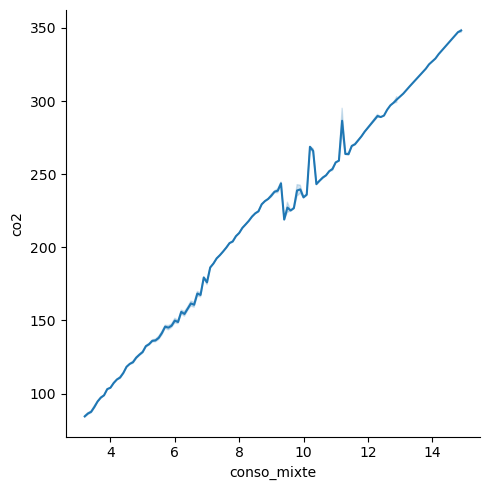

In [ ]:
plt.figure(figsize=(10,5))
sns.relplot(x='conso_mixte', y='co2',kind='line', data=df)

On observve une relation quasi linéaire entre les deux variable conso mixte et CO2.
il semble qu'il faille elimnier les conso pour avoir un jeu de données plus intéressant.

### Test svm avec moins de variable

In [ ]:
X2 = df_encoded.drop(['etiquette', 'co2', 'conso_mixte','puiss_max', 'conso_urb', 'conso_exurb'], axis=1)
y2 = df_encoded['etiquette']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.3, random_state=42)

In [ ]:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [ ]:
clf_svm2 = model_selection.GridSearchCV(SVM, parametres, cv=5, scoring='accuracy')
X2_train_scaled = np.array(X2_train_scaled)
y2_train = np.array(y2_train).ravel()
clf_svm2.fit(X2_train_scaled, y2_train)
print("Meilleurs paramètres :", clf_svm2.best_params_)
print("Meilleur score :", clf_svm2.best_score_)
y_pred_svm2_best = clf_svm2.best_estimator_.predict(X2_test_scaled)
print(pd.crosstab(y2_test, y_pred_svm2_best, rownames=['Classe réelle'], colnames=['Classe prédite']))
print("\nRapport de classification :")
print(classification_report(y2_test, y_pred_svm2_best))

Meilleurs paramètres : {'C': 30, 'kernel': 'rbf'}
Meilleur score : 0.8600573535436297
Classe prédite   0    1    2    3     4     5    6
Classe réelle                                     
0               48   19    1    0     0     0    0
1               20  303   48    4     0     0    0
2                2   71  549   65     1     0    0
3                0    3   72  338    58     0    0
4                0    0    6   36  4037   774    0
5                0    0    0    0   879  8183    3
6                0    0    0    0     1    11  161

Rapport de classification :
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        68
           1       0.77      0.81      0.79       375
           2       0.81      0.80      0.80       688
           3       0.76      0.72      0.74       471
           4       0.81      0.83      0.82      4853
           5       0.91      0.90      0.91      9065
           6       0.98      0.93      0.96    

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
SVM = svm.SVC()
parametres = {'C':[0.1,1,10,30],
              'kernel':['linear', 'sigmoid', 'rbf']}
clf_svm = model_selection.GridSearchCV(SVM, parametres, cv=5, scoring='accuracy')


In [41]:
X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train).ravel()
clf_svm.fit(X_train_scaled, y_train)

print("Meilleurs paramètres :", clf_svm.best_params_)
print("Meilleur score :", clf_svm.best_score_)
y_pred_svm_best = clf_svm.best_estimator_.predict(X_test_scaled)
print(pd.crosstab(y_test, y_pred_svm_best, rownames=['Classe réelle'], colnames=['Classe prédite']))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred_svm_best))

Meilleurs paramètres : {'C': 30, 'kernel': 'rbf'}
Meilleur score : 0.9267063866963298
Classe prédite    0    1    2    3    4  5  6
Classe réelle                                
0               154    9    0    0    0  0  0
1                14  359   15    1    0  0  0
2                 0   16  310   14    0  0  0
3                 0    2    5  222    4  0  0
4                 0    0    0    2  206  0  0
5                 0    0    0    0    1  6  0
6                 0    0    0    0    0  0  6

Rapport de classification :
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       163
           1       0.93      0.92      0.93       389
           2       0.94      0.91      0.93       340
           3       0.93      0.95      0.94       233
           4       0.98      0.99      0.98       208
           5       1.00      0.86      0.92         7
           6       1.00      1.00      1.00         6

    accuracy                         

In [42]:
y_train_pred = clf_svm.best_estimator_.predict(X_train_scaled)
print("\nRapport de classification train :")
print(classification_report(y_train, y_train_pred))


Rapport de classification train :
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       431
           1       0.94      0.96      0.95       886
           2       0.96      0.94      0.95       790
           3       0.98      0.99      0.98       531
           4       0.99      0.99      0.99       475
           5       1.00      0.67      0.80        18
           6       1.00      1.00      1.00         7

    accuracy                           0.96      3138
   macro avg       0.98      0.93      0.95      3138
weighted avg       0.96      0.96      0.96      3138



In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4484 entries, 0 to 5876
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   puiss_admin_98                   4484 non-null   int64  
 1   puiss_max                        4484 non-null   float64
 2   masse_ordma_min                  4484 non-null   int64  
 3   masse_ordma_max                  4484 non-null   int64  
 4   W (mm)                           4484 non-null   float64
 5   At1 (mm)                         4484 non-null   float64
 6   At2 (mm)                         4484 non-null   float64
 7   ec (cm3)                         4484 non-null   float64
 8   nb_rapp                          4484 non-null   int64  
 9   cod_cbr_ES                       4484 non-null   int32  
 10  cod_cbr_GH                       4484 non-null   int32  
 11  cod_cbr_GO                       4484 non-null   int32  
 12  hybride_non              

### Deep learning

In [44]:
import tensorflow as tf
#print(tf.__version__)


In [45]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [47]:
df_merge.dropna(inplace=True)
df_merge_X = df_merge.drop(['category', 'conso_urb', 'conso_exurb', 'conso_mixte', 'co2', 'co_typ_1', 'nox', 'ptcl'], axis=1)

X = pd.get_dummies(df_merge_X, dtype='int' )

y = df_merge['category'].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])
scaler = StandardScaler()
X = scaler.fit_transform(X)

X

C:\Users\Eloi\AppData\Local\Temp\ipykernel_9620\2179436010.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_merge['category'].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])


array([[ 0.48309207,  0.74148914,  0.24925475, ..., -0.69131537,
        -0.03660442,  0.6934302 ],
       [ 0.48309207,  0.74148914,  0.24925475, ..., -0.69131537,
        -0.03660442,  0.6934302 ],
       [ 0.48309207,  0.74148914,  0.46769671, ..., -0.69131537,
        -0.03660442,  0.6934302 ],
       ...,
       [ 1.48735023,  1.76418894,  1.2235059 , ..., -0.69131537,
        -0.03660442,  0.6934302 ],
       [ 1.48735023,  1.76418894,  1.2235059 , ..., -0.69131537,
        -0.03660442,  0.6934302 ],
       [ 1.48735023,  1.76418894,  1.2235059 , ..., -0.69131537,
        -0.03660442,  0.6934302 ]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [49]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(7, activation='softmax')  # 6 classes en sortie
])

c:\Users\Eloi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # Utilisé car y est encodé en entiers
    metrics=['accuracy']
)

In [53]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2725 - loss: 2.1069 - val_accuracy: 0.6054 - val_loss: 1.2533
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5385 - loss: 1.2513 - val_accuracy: 0.7179 - val_loss: 0.8592
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6145 - loss: 0.9956 - val_accuracy: 0.7837 - val_loss: 0.6667
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6501 - loss: 0.8815 - val_accuracy: 0.8060 - val_loss: 0.5845
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6833 - loss: 0.8049 - val_accuracy: 0.8305 - val_loss: 0.5195
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7310 - loss: 0.7223 - val_accuracy: 0.8540 - val_loss: 0.4822
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7192 - loss: 0.6966 - val_accuracy: 0.8606 - val_loss: 0.4442
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7416 - loss: 0.6647 - val_accuracy: 0.

In [54]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Perte: {loss:.4f}, Accuracy: {accuracy:.4f}')

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.9515 - loss: 0.1558
Perte: 0.1728, Accuracy: 0.9476


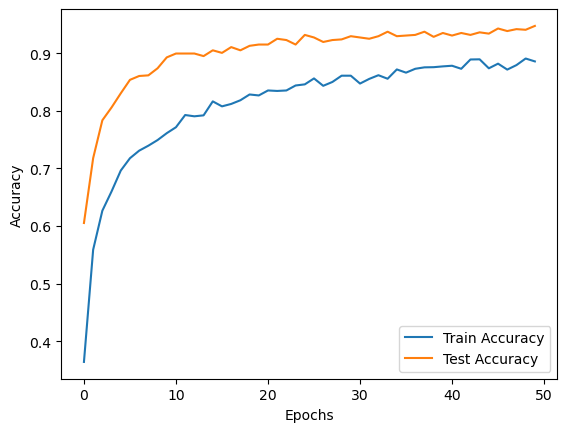

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [57]:
y_pred = model.predict(X_test).argmax(axis=1)  # Convertit les probabilités en labels prédits

# Affichage du rapport de classification
print(classification_report(y_test, y_pred))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       119
           1       0.95      0.96      0.95       255
           2       0.97      0.92      0.95       226
           3       0.88      0.95      0.92       153
           4       0.96      0.97      0.96       137
           5       1.00      0.40      0.57         5
           6       1.00      1.00      1.00         2

    accuracy                           0.95       897
   macro avg       0.96      0.88      0.90       897
weighted avg       0.95      0.95      0.95       897

